<a href="https://colab.research.google.com/github/mennakhale/DL/blob/main/Melo_Canceripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input , Lambda , Dense , Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import keras.layers
import numpy as np
import tensorflow as tf
from keras.models import load_model
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2
from keras.layers import Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
train_path = '/content/drive/MyDrive/melanoma_cancer_dataset/train'
test_path = '/content/drive/MyDrive/melanoma_cancer_dataset/test'

In [ ]:
images = [img for img in os.listdir('/content/drive/MyDrive/melanoma_cancer_dataset/train/benign') if img.endswith('.jpg')]
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(4,5,i+1)
  img = cv2.imread(os.path.join('/content/drive/MyDrive/melanoma_cancer_dataset/train/benign',images[i]))
  plt.imshow(img)
  plt.axis('off')
plt.show()

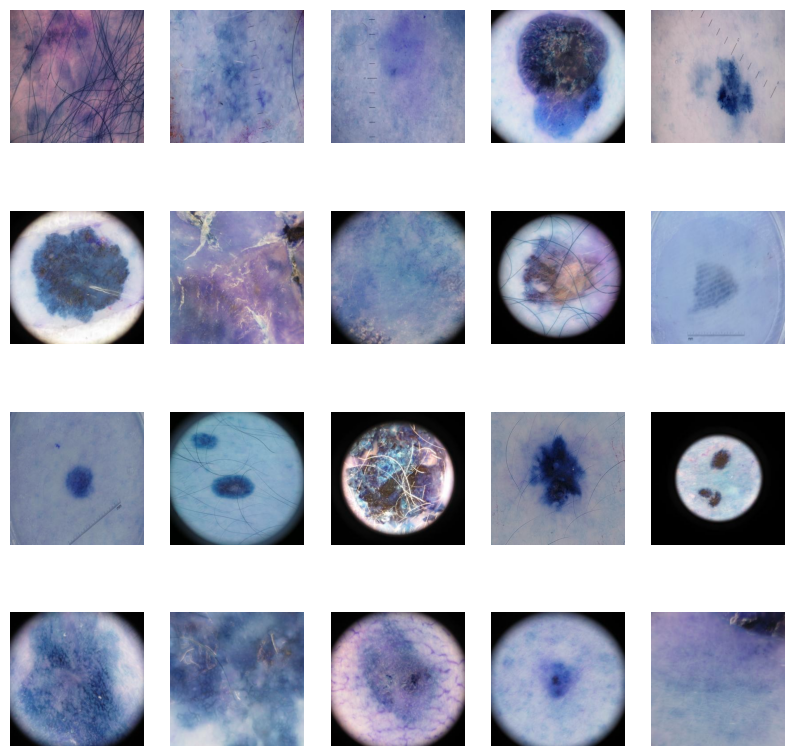

In [ ]:
images = [img for img in os.listdir('/content/drive/MyDrive/melanoma_cancer_dataset/train/malignant') if img.endswith('.jpg')]
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(4,5,i+1)
  img = cv2.imread(os.path.join('/content/drive/MyDrive/melanoma_cancer_dataset/train/malignant',images[i]))
  plt.imshow(img)
  plt.axis('off')
plt.show()

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

# Create the ImageDataGenerator with a wider range of augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increase rotation range
    width_shift_range=0.2,  # Increase width shift range
    height_shift_range=0.2,  # Increase height shift range
    shear_range=0.2,  # Add shear transformation
    zoom_range=0.2,  # Add zoom transformation
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'  # Handle missing pixels due to shifts
)

# Load the training data using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/melanoma_cancer_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

Found 9605 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train_generator)

In [ ]:
imgs = np.array(imgs)

In [ ]:
labels = np.array(labels)

In [ ]:
imgs = imgs.astype('float32')/255

In [ ]:
# Create the ImageDataGenerator with a wider range of augmentations
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increase rotation range
    width_shift_range=0.2,  # Increase width shift range
    height_shift_range=0.2,  # Increase height shift range
    shear_range=0.2,  # Add shear transformation
    zoom_range=0.2,  # Add zoom transformation
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'  # Handle missing pixels due to shifts
)

# Load the training data using flow_from_directory
test_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/melanoma_cancer_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

Found 1000 images belonging to 2 classes.


In [ ]:
x_test,y_test = next(test_generator)

In [ ]:
x_test= np.array(x_test)

In [ ]:
y_test=np.array(y_test)

In [ ]:
x_test = x_test.astype('float32')/255

In [ ]:
model_vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(224,224, 3))
model = Sequential()

for layer in model_vgg16.layers:
  model.add(layer)

for layer in model.layers:
  layer.trainable = False # Not trainable weights

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                         

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
early_stopping_monitor = EarlyStopping(patience = 10)
history = model.fit_generator(train_generator,validation_data=test_generator,epochs = 200,steps_per_epoch = 100,validation_steps = 50)

<ipython-input-19-26a87586042f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,validation_data=test_generator,epochs = 200,steps_per_epoch = 100,validation_steps = 50)


Epoch 1/200
100/100 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.7923

100/100 [==============================] - 1168s 12s/step - loss: 0.6913 - accuracy: 0.7923 - val_loss: 0.3570 - val_accuracy: 0.8360
Epoch 2/200
100/100 [==============================] - 660s 7s/step - loss: 0.3973 - accuracy: 0.8253
Epoch 3/200
100/100 [==============================] - 465s 5s/step - loss: 0.3633 - accuracy: 0.8424
Epoch 4/200
100/100 [==============================] - 342s 3s/step - loss: 0.3302 - accuracy: 0.8612
Epoch 5/200
100/100 [==============================] - 235s 2s/step - loss: 0.3560 - accuracy: 0.8478
Epoch 6/200
100/100 [==============================] - 173s 2s/step - loss: 0.3232 - accuracy: 0.8675
Epoch 7/200
100/100 [==============================] - 138s 1s/step - loss: 0.3143 - accuracy: 0.8625
Epoch 8/200
100/100 [==============================] - 99s 993ms/step - loss: 0.3182 - accuracy: 0.8616
Epoch 9/200
 82/100 [=======================>......] - ETA: 15s - loss: 0.3020 - accuracy: 0.8708